# DATA SCIENCE AND BUSINESS ANALYTICS AT THE SPARKS FOUNDATION

# TASK1 : PREDICTION USING SUPERVISED ML

# AUTHOR : MOHAMMAD SAYEED

# Importing all the required libraries

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [28]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)

In [29]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [30]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [31]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [32]:
df.shape

(25, 2)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [36]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Visualizing the dataset

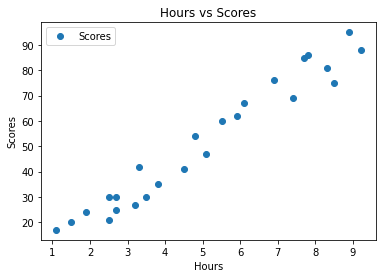

In [41]:
df.plot(x='Hours' , y='Scores' , style='o')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs Scores')
plt.show()

In [43]:
hours = df['Hours']
scores = df['Scores']

C:\Users\mdsay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

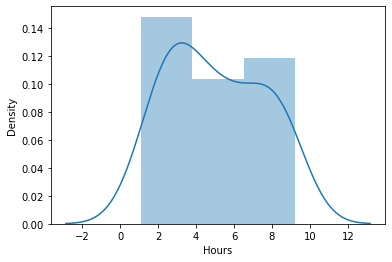

In [44]:
sns.distplot(hours)

C:\Users\mdsay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

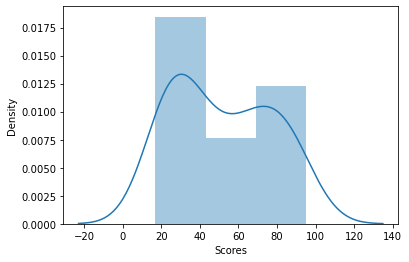

In [45]:
sns.distplot(scores)

In [46]:
df.corr

<bound method DataFrame.corr of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

# Preparing the dataset

In [47]:
X = df.iloc[: , :1].values
y = df.iloc[: , 1:].values

In [48]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [49]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [50]:
# splitting data into training and testing set
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=0)

# Training the algorithm

In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

# Visualizing the model

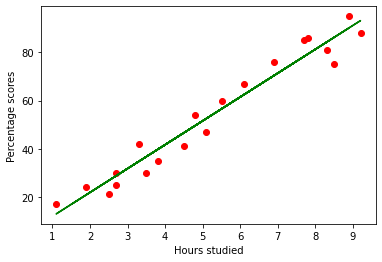

In [52]:
m = model.coef_
c = model.intercept_
line = m*X + c
plt.scatter(X_train , y_train , color='red')
plt.plot(X , line , color='green')
plt.xlabel('Hours studied')
plt.ylabel('Percentage scores')
plt.show()

plotting for test data

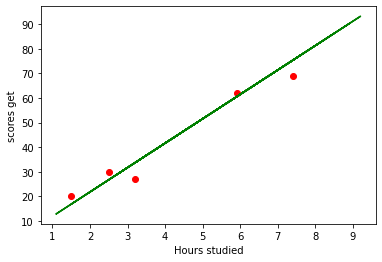

In [53]:
plt.scatter(X_test , y_test , color='red')
plt.plot(X , line , color='green')
plt.xlabel('Hours studied')
plt.ylabel('scores get')
plt.show()

# Making predictions

In [57]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [55]:
y_pred = model.predict(X_test)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [58]:
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [60]:
hours = 9.25
predicted_score = model.predict([[hours]])
print('predicted score is :' , predicted_score[0])

predicted score is : [93.69173249]


# Evaluation

In [61]:
from sklearn import metrics
print('Mean Absolute Error :' , metrics.mean_absolute_error(y_test , y_pred))

Mean Absolute Error : 4.183859899002975
